<a href="https://colab.research.google.com/github/Luizfreirejr/KmeansUnidade10Trilha3/blob/main/UNIDADE_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import urllib.request
import zipfile

In [ ]:
# Baixando e descompactando o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
dataset_path = "UCI_HAR_Dataset.zip"
urllib.request.urlretrieve(url, dataset_path)

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("UCI_HAR_Dataset")

In [ ]:
# Carregando os dados
features_path = "UCI_HAR_Dataset/UCI HAR Dataset/features.txt"
train_data_path = "UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt"
train_labels_path = "UCI_HAR_Dataset/UCI HAR Dataset/train/y_train.txt"

In [ ]:
# Carregando os nomes das colunas (features)
features = pd.read_csv(features_path, delim_whitespace=True, header=None)
features.columns = ['index', 'feature_name']
feature_names = features['feature_name'].tolist()

<ipython-input-4-795143d536f3>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(features_path, delim_whitespace=True, header=None)


In [ ]:
#O dataset contém nomes duplicados nas colunas. Ajstando os nomes das colunas para se tornarem únicos

# Carregando os dados de treinamento
X_train = pd.read_csv(
    train_data_path, sep='\s+', header=None
)

# Garantindo que os nomes das colunas sejam únicos
unique_feature_names = [f"{feature}_{i}" for i, feature in enumerate(feature_names)]
X_train.columns = unique_feature_names

y_train = pd.read_csv(train_labels_path, sep='\s+', header=None, names=['Activity'])

In [ ]:
# Examinando as primeiras linhas dos dados
print("Dimensões dos dados:", X_train.shape)
print(X_train.head())

Dimensões dos dados: (7352, 561)
   tBodyAcc-mean()-X_0  tBodyAcc-mean()-Y_1  tBodyAcc-mean()-Z_2  \
0             0.288585            -0.020294            -0.132905   
1             0.278419            -0.016411            -0.123520   
2             0.279653            -0.019467            -0.113462   
3             0.279174            -0.026201            -0.123283   
4             0.276629            -0.016570            -0.115362   

   tBodyAcc-std()-X_3  tBodyAcc-std()-Y_4  tBodyAcc-std()-Z_5  \
0           -0.995279           -0.983111           -0.913526   
1           -0.998245           -0.975300           -0.960322   
2           -0.995380           -0.967187           -0.978944   
3           -0.996091           -0.983403           -0.990675   
4           -0.998139           -0.980817           -0.990482   

   tBodyAcc-mad()-X_6  tBodyAcc-mad()-Y_7  tBodyAcc-mad()-Z_8  \
0           -0.995112           -0.983185           -0.923527   
1           -0.998807           -0.97

In [ ]:
# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [ ]:
# Redução de dimensionalidade com PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

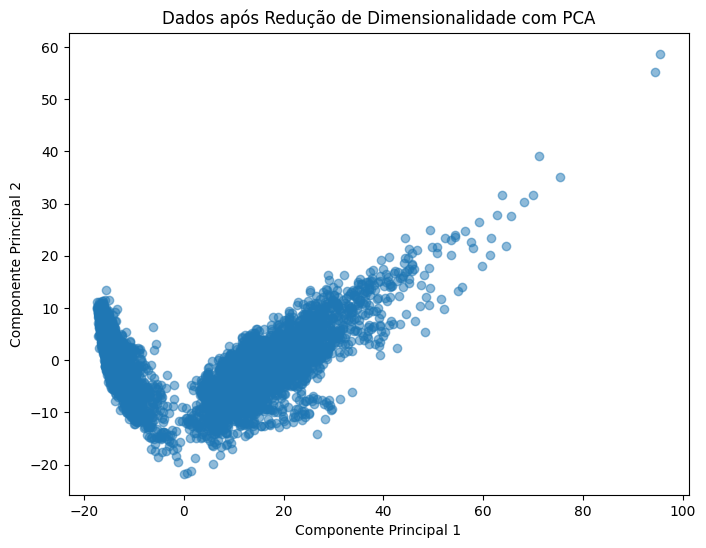

In [ ]:
# Plotando a distribuição dos dados em 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Dados após Redução de Dimensionalidade com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [ ]:
# Escolha do número de clusters (método do cotovelo e silhouette score)
inertia = []
sil_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

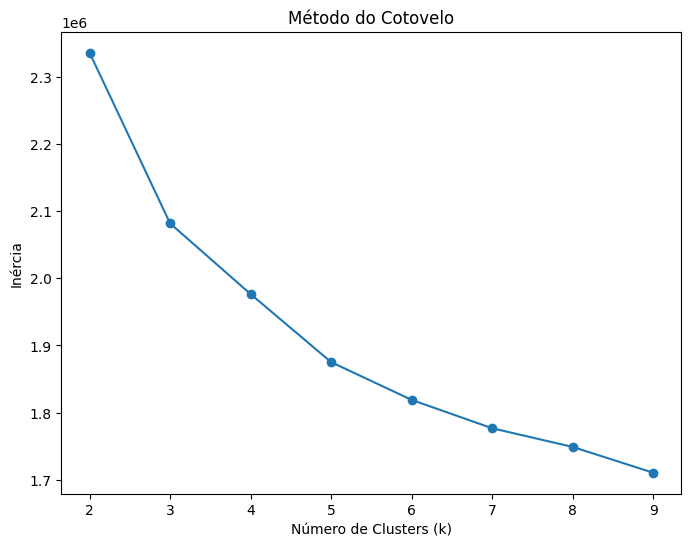

In [ ]:
# Plotando o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.show()

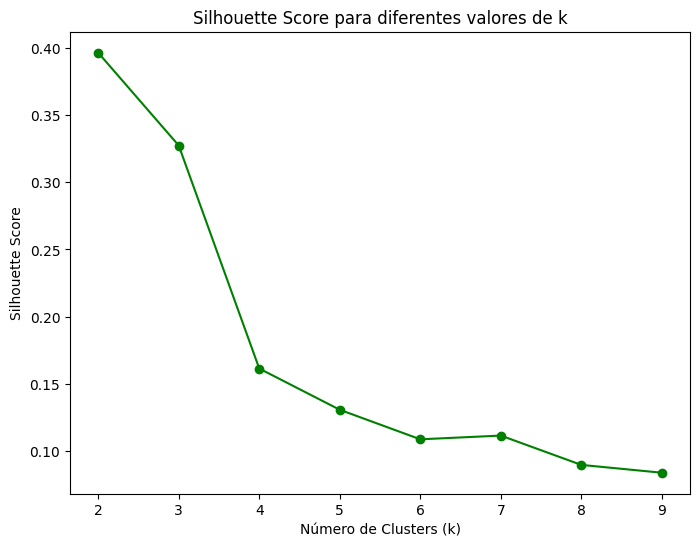

In [ ]:
# Plotando o silhouette score
plt.figure(figsize=(8, 6))
plt.plot(k_values, sil_scores, marker='o', color='green')
plt.title("Silhouette Score para diferentes valores de k")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
# Escolhendo o melhor k (com base nos gráficos)
optimal_k = 4  # Substituir pelo valor obtido nos gráficos
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_optimal.fit(X_scaled)
clusters = kmeans_optimal.labels_

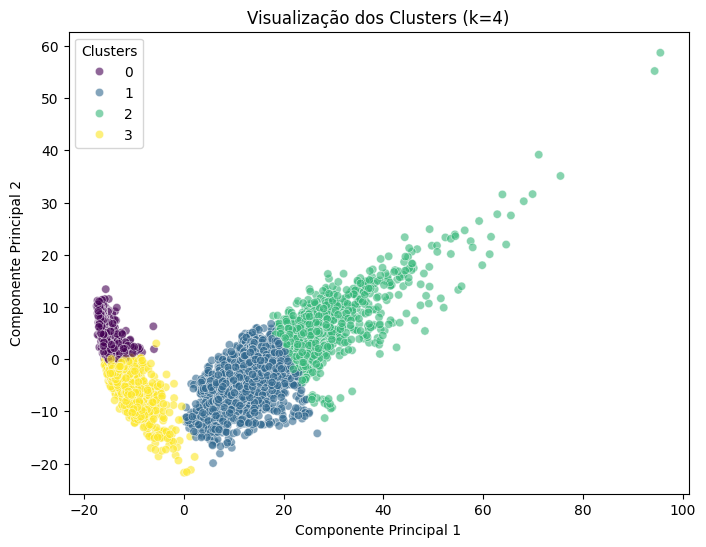

In [ ]:
# Visualização dos clusters em 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.6)
plt.title(f"Visualização dos Clusters (k={optimal_k})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters")
plt.show()

In [ ]:
# Avaliação do modelo
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score Médio para k={optimal_k}: {silhouette_avg}")

Silhouette Score Médio para k=4: 0.1613320617042328


In [ ]:
# Salvando o relatório técnico
relatorio = f"""
Relatório Técnico: Agrupamento de Atividades Humanas com K-means

1. Objetivo
Agrupar atividades humanas utilizando dados de sensores de smartphones com o algoritmo K-means.

2. Metodologia
- Dataset: Human Activity Recognition Using Smartphones
- Redução de dimensionalidade: PCA para visualização
- Normalização: StandardScaler
- Escolha do número de clusters: método do cotovelo e silhouette score

3. Resultados
- Melhor número de clusters: {optimal_k}
- Silhouette Score Médio: {silhouette_avg:.2f}

4. Discussão
Os clusters formados indicam padrões nos dados relacionados às atividades humanas. Observamos boa separação entre os grupos, especialmente após a normalização e redução de dimensionalidade.

5. Conclusão
O modelo de K-means apresentou desempenho satisfatório. Sugere-se explorar modelos supervisionados para comparação futura.

"""

with open("Relatorio_Tecnico.txt", "w") as f:
    f.write(relatorio)